# Distribution


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import seaborn.objects as so

## Stacked Histogram


In [2]:
mpg = pd.read_csv("data/mpg.csv")
mpg.head()


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


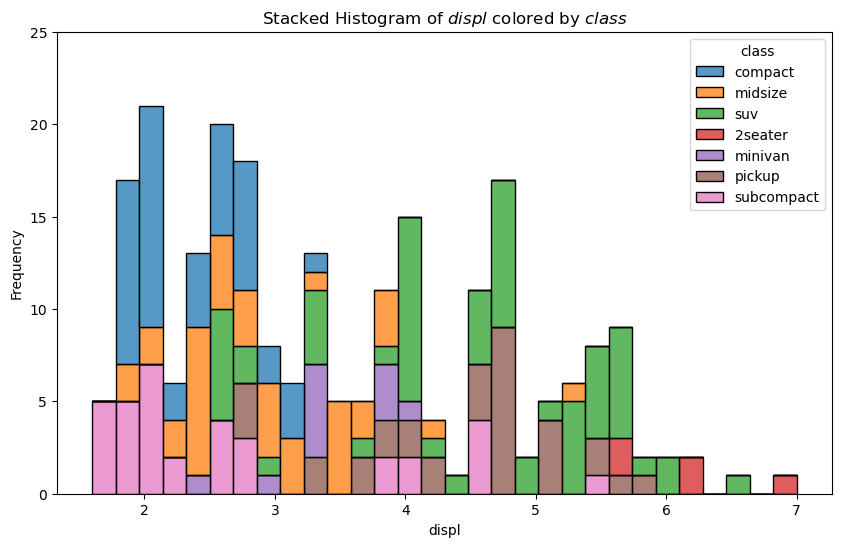

In [3]:
_, ax = plt.subplots(figsize=(10, 6))

x_var, group_var = "displ", "class"

sns.histplot(data=mpg, x=x_var, hue=group_var, bins=30, multiple="stack", ax=ax)

ax.set(
    ylim=(0, 25),
    xlabel=x_var,
    ylabel="Frequency",
    title=f"Stacked Histogram of ${x_var}$ colored by ${group_var}$",
)
plt.show()


## Density


In [4]:
mpg.rename(columns={"class": "_class"}, inplace=True)
mpg.head()


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,_class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


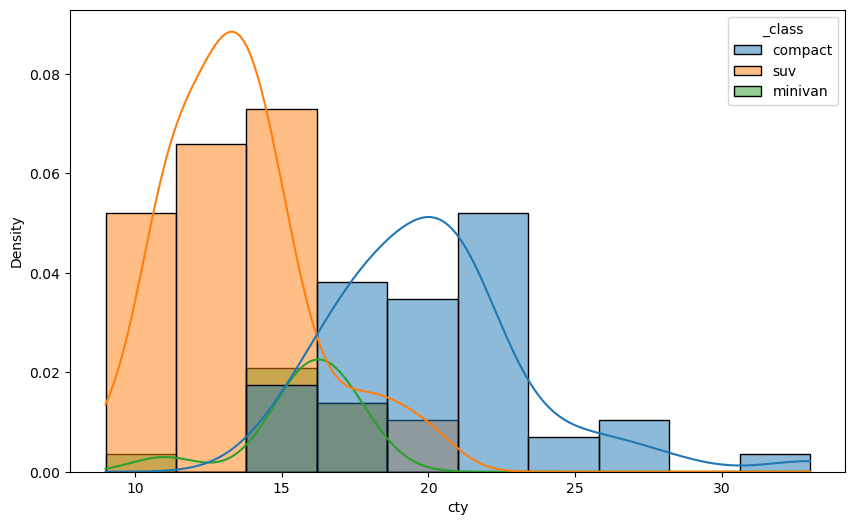

In [5]:
_, ax = plt.subplots(figsize=(10, 6))

sns.histplot(
    data=mpg.query("_class in ['compact', 'suv', 'minivan']"),
    x="cty",
    hue="_class",
    stat="density",
    kde=True,
    ax=ax,
)
plt.show()


## Box

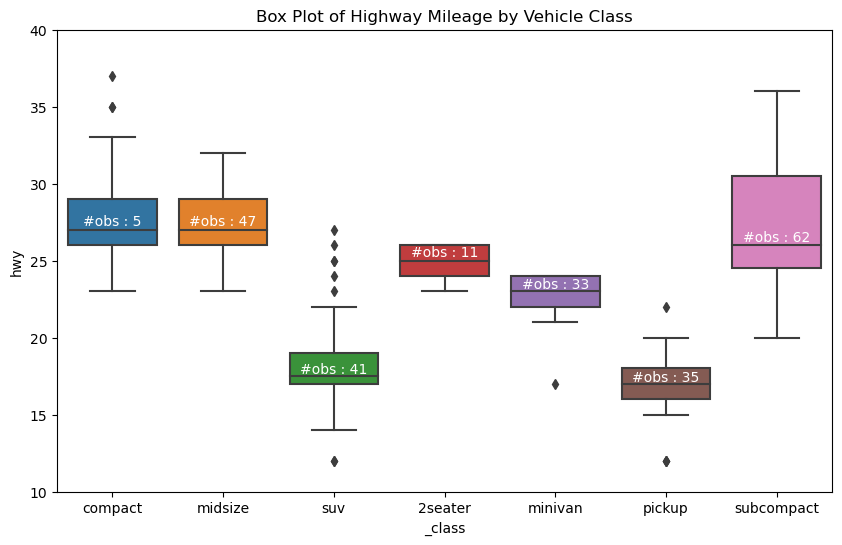

In [7]:
def add_n_obs(df, group_col, y) -> None:
    medians_dict = {group[0]: group[1][y].median() for group in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().array
    for (x, xticklabel), n_ob in zip(enumerate(xticklabels), n_obs):
        ax.text(
            x,
            medians_dict[xticklabel] * 1.01,
            f"#obs : {str(n_ob)}",
            horizontalalignment="center",
            fontdict={"size": "medium"},
            color="white",
        )


_, ax = plt.subplots(figsize=(10, 6))

sns.boxplot(x="_class", y="hwy", data=mpg, notch=False, ax=ax)
add_n_obs(mpg, group_col="_class", y="hwy")

ax.set(ylim=(10, 40), title="Box Plot of Highway Mileage by Vehicle Class")
plt.show()


## Pyramid


In [8]:
email = pd.read_csv("data/email_campaign_funnel.csv")
email.head()


,Stage,Gender,Users
0,Stage 01: Browsers,Male,-1.492762e+07
1,Stage 02: Unbounced Users,Male,-1.286266e+07
2,Stage 03: Email Signups,Male,-1.136190e+07
3,Stage 04: Email Confirmed,Male,-9.411708e+06
4,Stage 05: Campaign-Email Opens,Male,-8.074317e+06


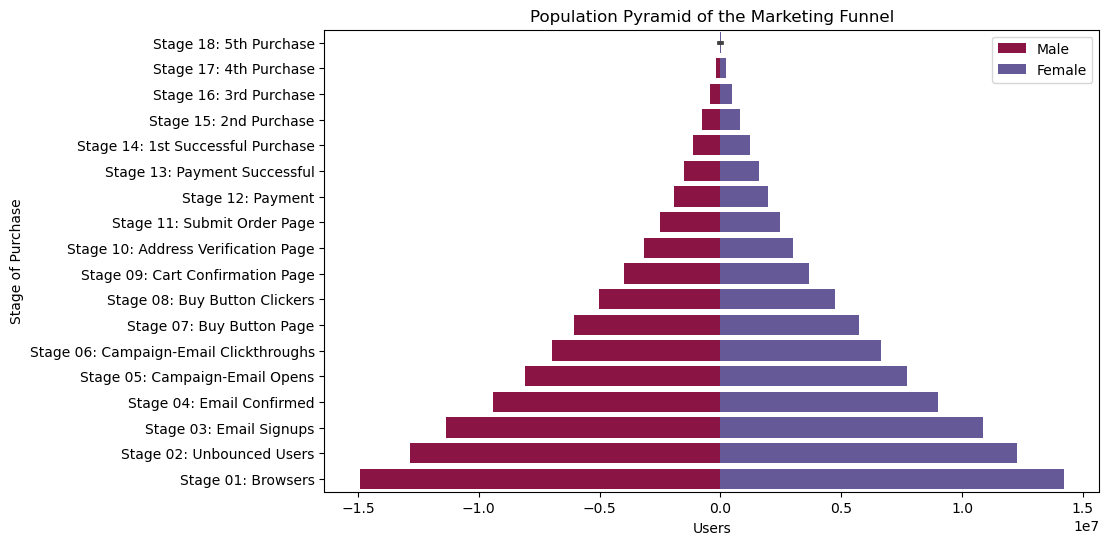

In [9]:
group_col = "Gender"
order_of_bars = email.Stage.unique()[::-1]

_, ax = plt.subplots(figsize=(10, 6))

colors = [
    plt.cm.Spectral(i / float(len(email[group_col].unique()) - 1))
    for i in range(len(email[group_col].unique()))
]

for c, group in zip(colors, email[group_col].unique()):
    sns.barplot(
        x="Users",
        y="Stage",
        data=email.loc[email[group_col] == group, :],
        order=order_of_bars,
        color=c,
        label=group,
        ax=ax,
    )

ax.set(
    xlabel="Users",
    ylabel="Stage of Purchase",
    title="Population Pyramid of the Marketing Funnel",
)
ax.legend()
plt.show()


## Category


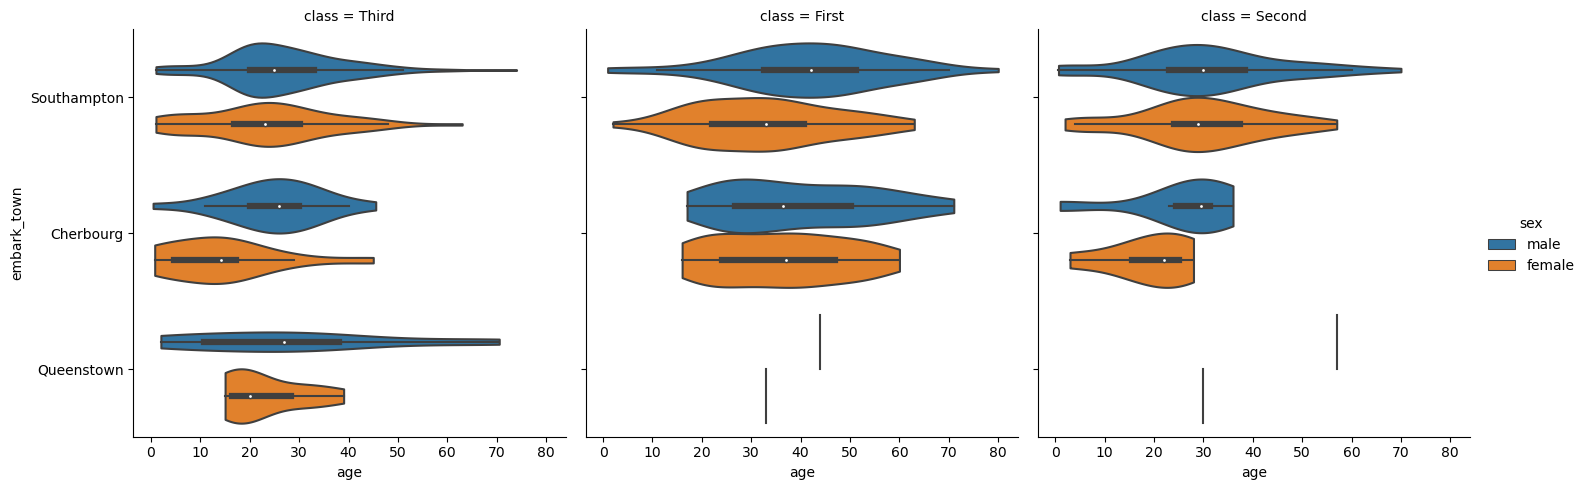

In [10]:
titanic = pd.read_csv("data/titanic.csv")

sns.catplot(
    x="age",
    y="embark_town",
    hue="sex",
    col="class",
    data=titanic[titanic.embark_town.notnull()],
    orient="h",
    height=5,
    aspect=1,
    palette="tab10",
    kind="violin",
    dodge=True,
    cut=0,
)
